In [ ]:
import numpy as np
import pandas as pd
import random
np.random.seed(10)
import matplotlib.pyplot as plt

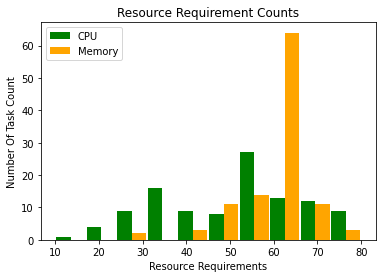

In [ ]:


df = df = pd.read_csv("/content/CNP.csv")

plt.xlabel("Resource Requirements")
plt.ylabel("Number Of Task Count")
plt.title("Resource Requirement Counts")
plt.hist([df['CPU'], df['Memory']], rwidth=0.95, color=['green','orange'],label=['CPU','Memory'])
plt.legend();


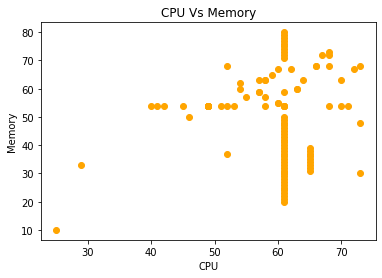

In [ ]:
plt.xlabel("CPU")
plt.ylabel("Memory")
plt.title("CPU Vs Memory")
plt.scatter(df['Memory'], df['CPU'], color='orange')
plt.show()

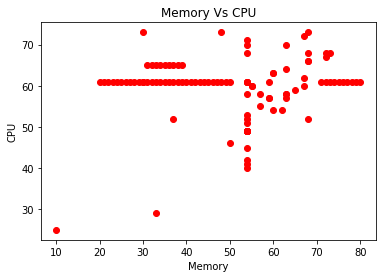

In [ ]:
plt.xlabel("Memory")
plt.ylabel("CPU")
plt.title("Memory Vs CPU")
plt.scatter(df['CPU'], df['Memory'], color='red')
plt.show()

In [ ]:
plt.xlabel("CPU")
plt.ylabel("Resources")
plt.title("CPU Vs Resources")
plt.scatter(df['CPU'], df['Memory'], color='orange')
plt.show()

In [ ]:
df = pd.read_csv("/content/CNP.csv", header = None, skiprows = 1)
df

In [ ]:
df.describe()

In [ ]:
df.shape

In [ ]:
arr = df.to_numpy()
arr

In [ ]:
lst = []
for i in range(5) : 
  row = random.randint(0, 106)
  lst.append(arr[row])
state = np.array(lst)
state

In [ ]:
class env:
    rand_seed = 10
    def __init__(self, resources, num_tasks):

        self.limit_ = 0
        
        lst = []
        for i in range(5) : 
          row = random.randint(0, 106)
          lst.append(arr[row])
        self.state_ = np.array(lst)
        print(self.state_)

        self.reward_ = 0
        for lim in resources:
            self.limit_+=lim   #Set the total resource limit as sum of resources
            
        self.num_tasks_ = num_tasks
        self.resources_ = resources      
    
    def get_initial_state(self):

        lst = []
        for i in range(5) : 
          row = random.randint(0, 106)
          lst.append(arr[row])
        self.state_ = np.array(lst)
        print(self.state_)

        self.reward_ = 0
        self.num_tasks_ = num_tasks
        return self.state_
    
    def getSum(self, x ):
        if x[0] == 1:
            return sum(x)-1
        else:
            return 0
   
    def get_next_step(self, actionIdx):
        ### update reward
        self.reward_ = 0
        reward = 0
        done = False
        #update the state based on action
        #case 1, if same task selected then penalize the agent

        if self.state_[actionIdx][0] == 1:
            sum_res = np.sum(self.state_[actionIdx], axis=0)
            reward = -sum_res/10;
        else:
            self.state_[actionIdx][0] = 1
       
        #collect all the resources for this batch until now.
        totReward = sum(np.apply_along_axis( self.getSum, axis=1, arr=self.state_ ))
        # get the sum for selected task
        sum_res = np.sum(self.state_[actionIdx], axis=0) 
        if totReward <= self.limit_:
            reward = sum_res
        else:
            reward = -sum_res/10;
            done = True
            
        return self.state_,reward,done

resources = [80, 73] #resource limits
num_tasks = 5
en = env(resources,num_tasks)
action = 1
en.get_next_step(action)

In [ ]:

from keras.models import Sequential
from keras.layers import InputLayer
from keras.models import Sequential
from keras.layers import Activation, Dense

resources = [80, 73] #resource limits
num_tasks = 5
input_layer_n = num_tasks
output_layer_n = 5
dense_layer_n = 10

envs = env(resources, num_tasks)

model = Sequential()
#model.add(InputLayer(batch_input_shape=(1, input_layer_n)))
model.add(InputLayer(batch_input_shape=(1, 3)))
model.add(Dense(dense_layer_n, activation='sigmoid'))
model.add(Dense(output_layer_n, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

num_job_samples = 106
# now execute the q learning
y = 0.95
eps = 0.5
decay_factor = 0.999
r_avg_list = []

for i in range(num_job_samples):   #batch of 5 jobs and total of 106 samples
    s = envs.get_initial_state()# stating state would be no selected jobs
    eps *= decay_factor
    print("Episode {} of {}".format(i + 1, num_job_samples))
    scheduled = False
    r_sum = 0

    while not scheduled:
        if np.random.random() < eps:
            a = np.random.randint(0, 5) #This will pick a random action
        else:
            #predicted value is a vector of q values
            print("prediction: ",model.predict(s))
            a = np.argmax(model.predict(s)[0]) 
        
        new_s, r, scheduled = envs.get_next_step(a) #Lets say it sel
        # print(np.array(new_s))
        #model.predict(np.array(new_s))
        target = r + y * np.max(model.predict(np.array(new_s)))
        #target = r + y * np.max(model.predict(np.array(new_s))
        target_vec = model.predict(s)
        #Update only the current state value
        target_vec[a] = target
        model.fit(s, target_vec, epochs=100, verbose=0)
        s = new_s
        r_sum += r
    r_avg_list.append(r_sum/106)
    print(r_avg_list)
#print(r_avg_list)

In [ ]:
len(r_avg_list)

In [ ]:
print(s)

In [ ]:
target_vec = model.predict([[0,52,73], [0,45,68], [0,25,50], [0,75,13], [0,25,33]])

In [ ]:
np.max(target_vec)